## Pre Processing and EDA

In [1]:
import pandas as pd

# Load the combined dataset
df = pd.read_csv("../data/processed/combined_data.csv")

# Basic preview
df.head()


,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,City
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished,Delhi
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished,Delhi
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished,Delhi
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished,Delhi
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished,Delhi


In [2]:
df.shape

(13910, 17)

In [3]:
df.columns.tolist()

['house_type',
 'house_size',
 'location',
 'city',
 'latitude',
 'longitude',
 'price',
 'currency',
 'numBathrooms',
 'numBalconies',
 'isNegotiable',
 'priceSqFt',
 'verificationDate',
 'description',
 'SecurityDeposit',
 'Status',
 'City']

In [4]:
df.isnull().sum()

house_type              0
house_size              0
location                0
city                    0
latitude                0
longitude               0
price                   0
currency                0
numBathrooms           56
numBalconies         8619
isNegotiable        12634
priceSqFt           13910
verificationDate        0
description           831
SecurityDeposit         0
Status                  0
City                    0
dtype: int64

#### house_type              0
#### house_size              0
#### location                0
#### city                    0
#### latitude                0
#### longitude               0
#### price                   0
#### currency                0
#### numBathrooms           56
#### numBalconies         8619
#### isNegotiable        12634
#### priceSqFt           13910
#### verificationDate        0
#### description           831
#### SecurityDeposit         0
#### Status                  0
#### City                    0


In [5]:
#### numBathrooms           56      int 
#### numBalconies         8619      int 
#### isNegotiable        12634      bool
#### priceSqFt           13910      float64
#### description         831        object



# Gonna fill the numBathrooms with median of the cols
df['numBathrooms'].fillna(df['numBathrooms'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14772\3022877763.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['numBathrooms'].fillna(df['numBathrooms'].median(), inplace=True)


In [6]:
# Now fill the values of numBalconies with 0 as because the it has near about 50% data missing
df['numBalconies'].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14772\959156555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['numBalconies'].fillna(0, inplace=True)


In [7]:
# We will drop this column as it has more than 80% percentage of missing values so it will be removed 
df.drop(columns=['isNegotiable'], inplace=True)


In [8]:
# Step 1: Remove commas and 'sq ft', then strip whitespace
df['house_size'] = df['house_size'].str.replace(',', '')
df['house_size'] = df['house_size'].str.replace('sq ft', '')
df['house_size'] = df['house_size'].str.strip()

# Step 2: Convert to numeric
df['house_size'] = pd.to_numeric(df['house_size'], errors='coerce')



df['priceSqFt'] = df['price'] / df['house_size']


In [9]:
df.house_size.head( )           

0     400
1     400
2     500
3    1020
4     810
Name: house_size, dtype: int64

In [10]:
df.price.head( )

0    22000
1    20000
2     8500
3    48000
4    20000
Name: price, dtype: int64

In [11]:
df['description'].fillna("No description available", inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14772\2523289420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna("No description available", inplace=True)


In [12]:
df.isnull().sum()

house_type          0
house_size          0
location            0
city                0
latitude            0
longitude           0
price               0
currency            0
numBathrooms        0
numBalconies        0
priceSqFt           0
verificationDate    0
description         0
SecurityDeposit     0
Status              0
City                0
dtype: int64

In [13]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,priceSqFt,verificationDate,description,SecurityDeposit,Status,City
0,1 RK Studio Apartment,400,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,0.0,55.000000,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished,Delhi
1,1 RK Studio Apartment,400,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,0.0,50.000000,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished,Delhi
2,2 BHK Independent Floor,500,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,0.0,17.000000,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished,Delhi
3,3 BHK Independent House,1020,Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,0.0,47.058824,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished,Delhi
4,2 BHK Apartment,810,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,0.0,24.691358,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished,Delhi


In [14]:
# Show all columns with object (non-numeric) datatype
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

# Show unique values for each to inspect what needs encoding
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:10])  # Show up to 10 unique values for preview


Categorical columns: ['house_type', 'location', 'city', 'currency', 'verificationDate', 'description', 'SecurityDeposit', 'Status', 'City']

Column: house_type
['1 RK Studio Apartment ' '2 BHK Independent Floor '
 '3 BHK Independent House ' '2 BHK Apartment ' '3 BHK Apartment '
 '3 BHK Independent Floor ' '4 BHK Independent Floor '
 '1 BHK Independent Floor ' '1 BHK Apartment ' '8 BHK Independent Floor ']

Column: location
['Kalkaji' 'Mansarover Garden' 'Uttam Nagar' 'Model Town'
 'Sector 13 Rohini' 'DLF Farms' 'laxmi nagar' 'Swasthya Vihar' 'Janakpuri'
 'Pitampura']

Column: city
['Delhi' 'Mumbai' 'Hisar' 'Pune']

Column: currency
['INR']

Column: verificationDate
['Posted a day ago' 'Posted 9 days ago' 'Posted 12 days ago'
 'Posted a year ago' 'Posted 2 years ago' 'Posted 3 years ago'
 'Posted 2 months ago' 'Posted a month ago' 'Posted 17 days ago'
 'Posted 13 days ago']

Column: description
['Fully furnished, loaded with amenities & gadgets- 1RK + lobby Set, with all facilities, Par

In [15]:
df.info()
print("\n\nSample rows:")
display(df.sample(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        13910 non-null  object 
 1   house_size        13910 non-null  int64  
 2   location          13910 non-null  object 
 3   city              13910 non-null  object 
 4   latitude          13910 non-null  float64
 5   longitude         13910 non-null  float64
 6   price             13910 non-null  int64  
 7   currency          13910 non-null  object 
 8   numBathrooms      13910 non-null  float64
 9   numBalconies      13910 non-null  float64
 10  priceSqFt         13910 non-null  float64
 11  verificationDate  13910 non-null  object 
 12  description       13910 non-null  object 
 13  SecurityDeposit   13910 non-null  object 
 14  Status            13910 non-null  object 
 15  City              13910 non-null  object 
dtypes: float64(5), int64(2), object(9)
memor

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,priceSqFt,verificationDate,description,SecurityDeposit,Status,City
12924,2 BHK Apartment,1000,Undri,Pune,18.460890,73.915062,16000,INR,2.0,2.0,16.000000,Posted 2 years ago,It has indoor games. Other amenities include c...,"40,000",Unfurnished,Pune
13378,1 BHK Apartment,700,Manjari,Pune,18.497959,73.969521,11100,INR,1.0,0.0,15.857143,Posted 3 years ago,Itâs a 1 bhk multistorey apartment situated ...,No Deposit,Unfurnished,Pune
8747,1 BHK Apartment,550,Kalwa,Mumbai,19.198650,73.002144,14000,INR,1.0,0.0,25.454545,Posted 3 years ago,Itâs a 1 bhk multistorey apartment situated ...,No Deposit,Semi-Furnished,Mumbai
244,3 BHK Independent Floor,3600,Anand Niketan,Delhi,28.578897,77.164581,190000,INR,3.0,0.0,52.777778,Posted 15 days ago,A spacious 3 bhk builder floor is available fo...,No Deposit,Semi-Furnished,Delhi
13065,1 BHK Apartment,600,Siddharth nagar,Pune,18.515247,73.772919,15000,INR,1.0,2.0,25.000000,Posted a year ago,Itâs a 1 bhk multistorey apartment situated ...,"45,000",Unfurnished,Pune


In [16]:
# Standardize and compare the two columns
df['city'] = df['city'].str.lower().str.strip()
df['City'] = df['City'].str.lower().str.strip()

# Drop 'City' if both are the same
if (df['city'] == df['City']).all():
    df.drop('City', axis=1, inplace=True)
    print("✅ Dropped 'City' column as it duplicates 'city'")
else:
    print("'city' and 'City' contain mismatched values. Manual inspection needed.")


'city' and 'City' contain mismatched values. Manual inspection needed.


In [17]:
mismatch = df[df['city'].str.lower().str.strip() != df['City'].str.lower().str.strip()]
display(mismatch[['city', 'City']])
print(f"⚠️ Total mismatches found: {len(mismatch)}")


,city,City
7724,hisar,mumbai
7842,hisar,mumbai
8548,hisar,mumbai
8559,hisar,mumbai
8849,hisar,mumbai
8945,hisar,mumbai
9409,hisar,mumbai
9420,hisar,mumbai


⚠️ Total mismatches found: 8


In [18]:
# List of index numbers to update
indices_to_update = [7724, 7842, 8548, 8559, 8849, 8945, 9409, 9420]

# Update 'City' column to 'Delhi' for these indices
df.loc[indices_to_update, 'City'] = 'Delhi'

# Drop the 'city' column
df.drop(columns=['city'], inplace=True)


In [19]:
for col in ['house_type', 'location', 'currency', 'Status', 'City']:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), '\n')


house_type: 34 unique values
house_type
2 BHK Apartment             4385
1 BHK Apartment             2622
3 BHK Apartment             1837
3 BHK Independent Floor     1571
4 BHK Independent Floor      786
Name: count, dtype: int64 

location: 702 unique values
location
Wagholi         743
Andheri West    362
Thane West      287
Andheri East    284
Kharghar        255
Name: count, dtype: int64 

currency: 1 unique values
currency
INR    13910
Name: count, dtype: int64 

Status: 3 unique values
Status
Unfurnished       5613
Semi-Furnished    5548
Furnished         2749
Name: count, dtype: int64 

City: 4 unique values
City
delhi     5000
mumbai    4992
pune      3910
Delhi        8
Name: count, dtype: int64 



In [20]:
df['SecurityDeposit'].unique()[:10]


array(['No Deposit', ' 13,000', ' 70,000', ' 56,000', ' 46,000',
       ' 50,000', ' 66,000', ' 36,000', ' 65,41,919', ' 60,10,155'],
      dtype=object)

In [21]:
# Drop unnecessary columns
df.drop(['currency', 'verificationDate'], axis=1, inplace=True)

# Confirm the changes
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['house_type', 'house_size', 'location', 'latitude', 'longitude', 'price', 'numBathrooms', 'numBalconies', 'priceSqFt', 'description', 'SecurityDeposit', 'Status', 'City']


In [22]:
def clean_deposit(value):
    if isinstance(value, str):
        value = value.strip()
        if value.lower() == 'no deposit':
            return 0
        return int(value.replace(',', ''))
    return value

# Apply cleaning
df['SecurityDeposit'] = df['SecurityDeposit'].apply(clean_deposit)

# Check results
print(df['SecurityDeposit'].unique()[:10])
print(df['SecurityDeposit'].dtype)


[      0   13000   70000   56000   46000   50000   66000   36000 6541919
 6010155]
int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   house_type       13910 non-null  object 
 1   house_size       13910 non-null  int64  
 2   location         13910 non-null  object 
 3   latitude         13910 non-null  float64
 4   longitude        13910 non-null  float64
 5   price            13910 non-null  int64  
 6   numBathrooms     13910 non-null  float64
 7   numBalconies     13910 non-null  float64
 8   priceSqFt        13910 non-null  float64
 9   description      13910 non-null  object 
 10  SecurityDeposit  13910 non-null  int64  
 11  Status           13910 non-null  object 
 12  City             13910 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 1.4+ MB


In [24]:
print(df['price'].unique()[:20])
print(df['price'].dtype)


[ 22000  20000   8500  48000  11000  35000  39000  90000  10000  15000
  24000  59000  45000  32500 220000  43000  30000  68000  55000  40000]
int64


## grouping the common places into areas and making it suitable for OHE

In [25]:
location_counts = df['location'].value_counts()
print(location_counts.head(10))
print(location_counts.tail(10))
print(len(location_counts))

location
Wagholi           743
Andheri West      362
Thane West        287
Andheri East      284
Kharghar          255
Dhanori           198
Ghansoli          196
Wakad             195
Defence Colony    189
Powai             175
Name: count, dtype: int64
location
Agalambe                  1
Ganj Peth                 1
Talegaon                  1
Pratik Nagar Mohanwadi    1
Shewalewadi               1
 Kharadi                  1
Kasarwadi                 1
Taljai Temple Road        1
Dighi Gaonthan            1
New DP Road               1
Name: count, dtype: int64
702


In [26]:
top_locations = df['location'].value_counts().nlargest(50).index

# Replace all other locations with "Other"
df['location'] = df['location'].apply(lambda x: x if x in top_locations else 'Other')


In [27]:
print(df['house_type'].value_counts())
print(df['house_type'].isnull().sum())


house_type
2 BHK Apartment              4385
1 BHK Apartment              2622
3 BHK Apartment              1837
3 BHK Independent Floor      1571
4 BHK Independent Floor       786
2 BHK Independent Floor       542
1 RK Studio Apartment         434
4 BHK Apartment               297
4 BHK Villa                   273
1 BHK Independent Floor       255
5 BHK Villa                   185
5 BHK Independent Floor       180
5 BHK Independent House       153
4 BHK Independent House       128
1 BHK Independent House        69
3 BHK Villa                    47
3 BHK Independent House        29
2 BHK Independent House        28
5 BHK Apartment                27
2 BHK Villa                    23
6 BHK Apartment                 6
6 BHK Independent Floor         6
6 BHK Villa                     5
1 BHK Villa                     5
6 BHK penthouse                 3
9 BHK Independent House         3
8 BHK Independent Floor         2
7 BHK Independent Floor         2
10 BHK Independent House        2
8 B

In [28]:
# Extract number of bedrooms (e.g., 1, 2, 3...) safely
df['bhk'] = df['house_type'].str.extract(r'(\d+)\s*BHK')[0].astype('Int64')

# Extract property type (e.g., Apartment, Villa, etc.)
df['property_type'] = df['house_type'].str.extract(r'BHK\s+(.*)')[0]

# Drop the original column if not needed
df.drop(columns=['house_type'], inplace=True)


In [29]:
print(df['bhk'].value_counts(dropna=False).sort_index())
print(df['property_type'].value_counts(dropna=False))


bhk
1       2951
2       4978
3       3484
4       1484
5        545
6         21
7          3
8          4
9          3
10         2
12         1
<NA>     434
Name: count, dtype: Int64
property_type
Apartment             9174
Independent Floor     3344
Villa                  539
NaN                    434
Independent House      416
penthouse                3
Name: count, dtype: int64


In [30]:
df['numBathrooms'].value_counts(dropna=False).sort_index()


numBathrooms
1.0     2755
2.0     6205
3.0     2846
4.0     1946
5.0      117
6.0       26
7.0        6
8.0        5
9.0        3
10.0       1
Name: count, dtype: int64

In [31]:
df = df[df['numBathrooms'] < 9].copy()


In [32]:
df['numBathrooms'].value_counts(dropna=False).sort_index()


numBathrooms
1.0    2755
2.0    6205
3.0    2846
4.0    1946
5.0     117
6.0      26
7.0       6
8.0       5
Name: count, dtype: int64

In [33]:
df['numBalconies'].value_counts(dropna=False).sort_index()


numBalconies
0.0    8617
1.0    1561
2.0    3204
3.0     369
4.0     133
5.0      16
6.0       5
8.0       1
Name: count, dtype: int64

In [34]:
df = df[df['numBalconies'] <= 6]


In [35]:
df['numBalconies'].value_counts().sort_index()


numBalconies
0.0    8617
1.0    1561
2.0    3204
3.0     369
4.0     133
5.0      16
6.0       5
Name: count, dtype: int64

In [36]:
df['priceSqFt'].describe()


count    13905.000000
mean        47.414322
std         39.476161
min          4.000000
25%         20.576132
50%         32.941176
75%         62.500000
max        382.024843
Name: priceSqFt, dtype: float64

4sq home baba re 

In [37]:
df['priceSqFt'].value_counts(dropna=False).head(20)


priceSqFt
20.000000     248
25.000000     158
105.396359    149
33.333333     141
50.000000     121
30.000000     107
40.000000      95
26.666667      94
66.666667      91
22.222222      87
51.053596      85
16.666667      84
68.014247      84
23.333333      83
105.399860     67
100.000000     62
55.555556      58
10.000000      57
51.055292      57
46.160405      56
Name: count, dtype: int64

In [38]:
df.drop(columns=['description'], inplace=True)


In [39]:
df['location'].value_counts(dropna=False)


location
Other                 6470
Wagholi                743
Andheri West           362
Thane West             287
Andheri East           284
Kharghar               255
Dhanori                198
Ghansoli               196
Wakad                  195
Defence Colony         189
Powai                  175
Chembur                158
Hinjewadi              157
Borivali East          153
Greater kailash 1      153
Santacruz East         151
Chattarpur             145
Kharadi                145
Vasant Vihar           145
Lohegaon               142
Jor bagh               125
Safdarjung Enclave     118
Baner                  117
Hadapsar               116
Kalyan West            115
Goregaon East          114
Mira Road East         112
Saket                  111
Dombivali              110
Goregaon West          108
Mulund West            108
Hauz Khas              107
Greater Kailash        107
Panchsheel Park        105
Golf Links             105
Kondhwa                103
Bandra West        

In [40]:
# Step 1: Group rare locations as 'Other'
location_counts = df['location'].value_counts()
rare_locations = location_counts[location_counts < 50].index
df['location'] = df['location'].replace(rare_locations, 'Other')

# Step 2: Label encode
from sklearn.preprocessing import LabelEncoder
le_location = LabelEncoder()
df['location'] = le_location.fit_transform(df['location'])


In [41]:
df['latitude'].describe()
df['latitude'].isna().sum()


np.int64(0)

In [42]:
print("Min:", df['latitude'].min())
print("Max:", df['latitude'].max())


Min: 17.46821976
Max: 31.10658646


In [43]:
print(df['longitude'].isnull().sum())
print("Min:", df['longitude'].min())
print("Max:", df['longitude'].max())


0
Min: 18.49789619
Max: 91.79213715


In [44]:
swapped = df[
    (df['latitude'].between(68, 97)) &
    (df['longitude'].between(6, 37))
]
print("Potentially swapped rows:", len(swapped))
swapped.head()


Potentially swapped rows: 0


,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,SecurityDeposit,Status,City,bhk,property_type


In [45]:
df = df[df['longitude'].between(68, 97)]


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13900 entries, 0 to 13909
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   house_size       13900 non-null  int64  
 1   location         13900 non-null  int64  
 2   latitude         13900 non-null  float64
 3   longitude        13900 non-null  float64
 4   price            13900 non-null  int64  
 5   numBathrooms     13900 non-null  float64
 6   numBalconies     13900 non-null  float64
 7   priceSqFt        13900 non-null  float64
 8   SecurityDeposit  13900 non-null  int64  
 9   Status           13900 non-null  object 
 10  City             13900 non-null  object 
 11  bhk              13466 non-null  Int64  
 12  property_type    13466 non-null  object 
dtypes: Int64(1), float64(5), int64(4), object(3)
memory usage: 1.5+ MB


In [47]:
df[['bhk', 'property_type']].isnull().sum()


bhk              434
property_type    434
dtype: int64

In [48]:
df[df['bhk'].isnull() | df['property_type'].isnull()]


,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,SecurityDeposit,Status,City,bhk,property_type
0,400,37,28.545561,77.254349,22000,1.0,0.0,55.000000,0,Furnished,delhi,<NA>,NaN
1,400,37,28.643259,77.132828,20000,1.0,0.0,50.000000,0,Furnished,delhi,<NA>,NaN
29,300,37,28.653690,77.169159,15500,1.0,0.0,51.666667,0,Furnished,delhi,<NA>,NaN
51,400,21,28.558958,77.204079,20000,1.0,0.0,50.000000,0,Semi-Furnished,delhi,<NA>,NaN
67,400,37,28.560387,77.212837,14000,1.0,0.0,35.000000,0,Furnished,delhi,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13856,400,37,18.657989,73.774261,8500,1.0,1.0,21.250000,20000,Semi-Furnished,pune,<NA>,NaN
13859,250,37,18.657471,73.768379,6000,1.0,1.0,24.000000,10000,Semi-Furnished,pune,<NA>,NaN
13860,350,37,18.657471,73.768379,8500,2.0,1.0,24.285714,15000,Semi-Furnished,pune,<NA>,NaN
13865,400,37,18.649200,73.765778,6000,1.0,1.0,15.000000,15000,Unfurnished,pune,<NA>,NaN


In [49]:
df = df.dropna(subset=['bhk', 'property_type'])


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13466 entries, 2 to 13909
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   house_size       13466 non-null  int64  
 1   location         13466 non-null  int64  
 2   latitude         13466 non-null  float64
 3   longitude        13466 non-null  float64
 4   price            13466 non-null  int64  
 5   numBathrooms     13466 non-null  float64
 6   numBalconies     13466 non-null  float64
 7   priceSqFt        13466 non-null  float64
 8   SecurityDeposit  13466 non-null  int64  
 9   Status           13466 non-null  object 
 10  City             13466 non-null  object 
 11  bhk              13466 non-null  Int64  
 12  property_type    13466 non-null  object 
dtypes: Int64(1), float64(5), int64(4), object(3)
memory usage: 1.5+ MB


In [51]:
df['priceSqFt'].describe()


count    13466.000000
mean        47.468209
std         39.701155
min          4.000000
25%         20.519836
50%         32.577849
75%         62.500000
max        382.024843
Name: priceSqFt, dtype: float64

In [52]:
df['priceSqFt'].isnull().sum()


np.int64(0)

In [53]:
df['Status'].describe()

count           13466
unique              3
top       Unfurnished
freq             5517
Name: Status, dtype: object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13466 entries, 2 to 13909
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   house_size       13466 non-null  int64  
 1   location         13466 non-null  int64  
 2   latitude         13466 non-null  float64
 3   longitude        13466 non-null  float64
 4   price            13466 non-null  int64  
 5   numBathrooms     13466 non-null  float64
 6   numBalconies     13466 non-null  float64
 7   priceSqFt        13466 non-null  float64
 8   SecurityDeposit  13466 non-null  int64  
 9   Status           13466 non-null  object 
 10  City             13466 non-null  object 
 11  bhk              13466 non-null  Int64  
 12  property_type    13466 non-null  object 
dtypes: Int64(1), float64(5), int64(4), object(3)
memory usage: 1.5+ MB


## TEST TRAIN SPLIT

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Backup your target
y = df['price']

# Drop target column
X = df.drop(columns=['price'])


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [57]:
categorical_cols = ['Status', 'City', 'property_type']
numerical_cols = X.select_dtypes(include=['int64', 'float64', 'Int64']).columns.tolist()

# Remove 'price' and categorical ones from numeric list if present
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]


In [58]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit only on train categorical columns
ohe.fit(X_train[categorical_cols])

# Transform both
X_train_cat = pd.DataFrame(
    ohe.transform(X_train[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X_train.index
)

X_test_cat = pd.DataFrame(
    ohe.transform(X_test[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X_test.index
)


In [59]:
X_train_final = pd.concat([X_train[numerical_cols], X_train_cat], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_cat], axis=1)


In [60]:
X_train_final

,house_size,location,latitude,longitude,numBathrooms,numBalconies,priceSqFt,SecurityDeposit,bhk,Status_Furnished,...,Status_Unfurnished,City_Delhi,City_delhi,City_mumbai,City_pune,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Villa,property_type_penthouse
13560,960,50,18.599226,73.763298,2.0,1.0,15.625000,40000,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
11812,1102,33,18.620728,73.915016,2.0,0.0,18.148820,60000,2,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7854,2000,37,18.958918,72.812401,4.0,2.0,150.000000,1800000,3,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5767,990,35,19.283638,72.873894,2.0,0.0,22.222222,0,2,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
12320,1034,11,21.875740,83.992943,2.0,0.0,14.506770,0,2,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,650,45,19.227955,72.968185,2.0,0.0,49.230769,0,2,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13858,650,37,18.644442,73.748817,1.0,0.0,16.153846,30000,1,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5557,1100,16,19.153334,72.885765,3.0,0.0,34.545455,0,3,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
875,1800,37,28.538738,77.249092,3.0,0.0,55.555556,0,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [61]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10772 entries, 13560 to 7485
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   house_size                        10772 non-null  int64  
 1   location                          10772 non-null  int64  
 2   latitude                          10772 non-null  float64
 3   longitude                         10772 non-null  float64
 4   numBathrooms                      10772 non-null  float64
 5   numBalconies                      10772 non-null  float64
 6   priceSqFt                         10772 non-null  float64
 7   SecurityDeposit                   10772 non-null  int64  
 8   bhk                               10772 non-null  Int64  
 9   Status_Furnished                  10772 non-null  float64
 10  Status_Semi-Furnished             10772 non-null  float64
 11  Status_Unfurnished                10772 non-null  float64
 12  City_D

## Random Forest

In [62]:
import pandas as pd
import numpy as np
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# === Load Data ===
data_path = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\data\processed\combined_data.csv"
df = pd.read_csv(data_path)

# === Separate Features & Target ===
X = df.drop(columns=['price'])
y = df['price']

# === Split before Encoding ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Identify column types ===
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# === Preprocessing pipeline ===
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# === Combine preprocessing and model into pipeline ===
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1))
])

# === Train the model ===
start_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_time

# === Predict ===
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

# === Metrics Function ===
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, r2, adj_r2, mape

# === Evaluate ===
train_metrics = get_metrics(y_train, train_preds)
test_metrics = get_metrics(y_test, test_preds)

# === Print Results ===
def print_metrics(name, metrics):
    print(f"📊 Evaluation on {name} Set:")
    print(f"MAE: {metrics[0]:.2f}")
    print(f"RMSE: {metrics[1]:.2f}")
    print(f"R² Score: {metrics[2]:.6f}")
    print(f"Adjusted R²: {metrics[3]:.6f}")
    print(f"MAPE: {metrics[4]:.2f} %\n")

print_metrics("Train", train_metrics)
print_metrics("Test", test_metrics)

# === Save Logs ===
log_folder = os.path.join("backend", "logs")
os.makedirs(log_folder, exist_ok=True)
log_file = os.path.join(log_folder, "random_forest_metrics.log")

with open(log_file, "a") as f:
    f.write(f"\n=== Random Forest Regressor - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===\n")
    f.write(f"Training Time: {train_time:.2f} sec\n")
    f.write("Train Metrics:\n")
    f.write(f"  MAE: {train_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {train_metrics[1]:.2f}\n")
    f.write(f"  R²: {train_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {train_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {train_metrics[4]:.2f} %\n")
    f.write("Test Metrics:\n")
    f.write(f"  MAE: {test_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {test_metrics[1]:.2f}\n")
    f.write(f"  R²: {test_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {test_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {test_metrics[4]:.2f} %\n")
    f.write("===============================================\n")

print(f"📁 Metrics logged to: {log_file}")


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


📊 Evaluation on Train Set:
MAE: 6437.15
RMSE: 22385.77
R² Score: 0.986640
Adjusted R²: 0.986620
MAPE: 6.86 %

📊 Evaluation on Test Set:
MAE: 18000.93
RMSE: 54352.98
R² Score: 0.920226
Adjusted R²: 0.919764
MAPE: 16.63 %

📁 Metrics logged to: backend\logs\random_forest_metrics.log


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [63]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have access to y_test and test_preds from your earlier model code
# Run this immediately after your training and evaluation

# Folder to save visualizations
base_dir = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\utils\backend\logs\visualizations"
folder_name = "XG_visualtations"
save_path = os.path.join(base_dir, folder_name)
os.makedirs(save_path, exist_ok=True)

# === Residual Plot ===
plt.figure(figsize=(8, 6))
residuals = y_test - test_preds
sns.scatterplot(x=test_preds, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "residual_plot.png"))
plt.close()

# === Actual vs Predicted Scatter Plot ===
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=test_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "actual_vs_predicted.png"))
plt.close()

# === Error Distribution Histogram ===
plt.figure(figsize=(8, 6))
errors = y_test - test_preds
sns.histplot(errors, kde=True, bins=30)
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "error_distribution.png"))
plt.close()

# === New: Sorted Line Plot for Actual vs Predicted ===
import numpy as np
sorted_idx = np.argsort(y_test)
sorted_actual = y_test.values[sorted_idx]
sorted_pred = test_preds[sorted_idx]

plt.figure(figsize=(10, 6))
plt.plot(sorted_actual, label='Actual Prices', color='blue')
plt.plot(sorted_pred, label='Predicted Prices', color='orange')
plt.title("Sorted Line Plot: Actual vs Predicted Prices")
plt.xlabel("Test Sample Index (Sorted by Actual)")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "sorted_actual_vs_predicted.png"))
plt.close()

print(f"✅ All visualizations saved to:\n{save_path}")


✅ All visualizations saved to:
D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\utils\backend\logs\visualizations\XG_visualtations


In [64]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### XG-Boost

In [65]:
import pandas as pd
import numpy as np
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from xgboost import XGBRegressor

# === Load Data ===
data_path = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\data\processed\combined_data.csv"
df = pd.read_csv(data_path)

# === Separate Features & Target ===
X = df.drop(columns=['price'])
y = df['price']

# === Split before Encoding ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Identify column types ===
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# === Preprocessing pipeline ===
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# === Combine preprocessing and model into pipeline ===
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1))
])

# === Train the model ===
start_time = time.time()
xgb_model.fit(X_train, y_train)
train_time = time.time() - start_time

# === Predict ===
train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

# === Metrics Function ===
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, r2, adj_r2, mape

# === Evaluate ===
train_metrics = get_metrics(y_train, train_preds)
test_metrics = get_metrics(y_test, test_preds)

# === Print Results ===
def print_metrics(name, metrics):
    print(f"📊 Evaluation on {name} Set:")
    print(f"MAE: {metrics[0]:.2f}")
    print(f"RMSE: {metrics[1]:.2f}")
    print(f"R² Score: {metrics[2]:.6f}")
    print(f"Adjusted R²: {metrics[3]:.6f}")
    print(f"MAPE: {metrics[4]:.2f} %\n")

print_metrics("Train", train_metrics)
print_metrics("Test", test_metrics)

# === Save Logs ===
log_folder = os.path.join("backend", "logs")
os.makedirs(log_folder, exist_ok=True)
log_file = os.path.join(log_folder, "xgboost_metrics.log")

with open(log_file, "a") as f:
    f.write(f"\n=== XGBoost Regressor - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===\n")
    f.write(f"Training Time: {train_time:.2f} sec\n")
    f.write("Train Metrics:\n")
    f.write(f"  MAE: {train_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {train_metrics[1]:.2f}\n")
    f.write(f"  R²: {train_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {train_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {train_metrics[4]:.2f} %\n")
    f.write("Test Metrics:\n")
    f.write(f"  MAE: {test_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {test_metrics[1]:.2f}\n")
    f.write(f"  R²: {test_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {test_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {test_metrics[4]:.2f} %\n")
    f.write("===============================================\n")

print(f"📁 Metrics logged to: {log_file}")


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


📊 Evaluation on Train Set:
MAE: 20148.41
RMSE: 39526.67
R² Score: 0.958346
Adjusted R²: 0.958286
MAPE: 37.98 %

📊 Evaluation on Test Set:
MAE: 23284.77
RMSE: 54940.66
R² Score: 0.918492
Adjusted R²: 0.918020
MAPE: 36.20 %

📁 Metrics logged to: backend\logs\xgboost_metrics.log


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# === Visualization Save Path ===
base_dir = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\utils\backend\logs\visualizations"
folder_name = "XG_visualtations"
save_path = os.path.join(base_dir, folder_name)
os.makedirs(save_path, exist_ok=True)

# === Residual Plot ===
plt.figure(figsize=(8, 6))
residuals = y_test - test_preds
sns.scatterplot(x=test_preds, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "residual_plot.png"))
plt.close()

# === Actual vs Predicted Scatter Plot ===
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=test_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "actual_vs_predicted.png"))
plt.close()

# === Error Distribution Histogram ===
plt.figure(figsize=(8, 6))
errors = y_test - test_preds
sns.histplot(errors, kde=True, bins=30)
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "error_distribution.png"))
plt.close()

# === Sorted Actual vs Predicted Line Plot ===
sorted_idx = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_idx]
sorted_pred = test_preds[sorted_idx]

plt.figure(figsize=(10, 6))
plt.plot(sorted_actual.values, label='Actual Prices', color='blue')
plt.plot(sorted_pred, label='Predicted Prices', color='orange')
plt.title("Sorted Line Plot: Actual vs Predicted Prices")
plt.xlabel("Test Sample Index (Sorted by Actual)")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "sorted_actual_vs_predicted.png"))
plt.close()

print(f"✅ All XGBoost visualizations saved to:\n{save_path}")


✅ All XGBoost visualizations saved to:
D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\utils\backend\logs\visualizations\XG_visualtations


In [67]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### LightGBM 

In [68]:
import pandas as pd
import numpy as np
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
from datetime import datetime

# === Load Data ===
data_path = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\data\processed\combined_data.csv"
df = pd.read_csv(data_path)

# === Separate Features & Target ===
X = df.drop(columns=['price'])
y = df['price']

# === Split before Encoding ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Identify column types ===
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# === Preprocessing pipeline ===
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# === Combine preprocessing and model into pipeline ===
lgbm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1))
])

# === Train the model ===
start_time = time.time()
lgbm_model.fit(X_train, y_train)
train_time = time.time() - start_time

# === Predict ===
train_preds = lgbm_model.predict(X_train)
test_preds = lgbm_model.predict(X_test)

# === Metrics Function ===
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, r2, adj_r2, mape

# === Evaluate ===
train_metrics = get_metrics(y_train, train_preds)
test_metrics = get_metrics(y_test, test_preds)

# === Print Results ===
def print_metrics(name, metrics):
    print(f"📊 Evaluation on {name} Set:")
    print(f"MAE: {metrics[0]:.2f}")
    print(f"RMSE: {metrics[1]:.2f}")
    print(f"R² Score: {metrics[2]:.6f}")
    print(f"Adjusted R²: {metrics[3]:.6f}")
    print(f"MAPE: {metrics[4]:.2f} %\n")

print_metrics("Train", train_metrics)
print_metrics("Test", test_metrics)

# === Save Logs ===
log_folder = os.path.join("backend", "logs")
os.makedirs(log_folder, exist_ok=True)
log_file = os.path.join(log_folder, "lightgbm_metrics.log")

with open(log_file, "a", encoding="utf-8") as f:
    f.write(f"\n=== LightGBM Regressor - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===\n")
    f.write(f"Training Time: {train_time:.2f} sec\n")
    f.write("Train Metrics:\n")
    f.write(f"  MAE: {train_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {train_metrics[1]:.2f}\n")
    f.write(f"  R²: {train_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {train_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {train_metrics[4]:.2f} %\n")
    f.write("Test Metrics:\n")
    f.write(f"  MAE: {test_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {test_metrics[1]:.2f}\n")
    f.write(f"  R²: {test_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {test_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {test_metrics[4]:.2f} %\n")
    f.write("===============================================\n")

print(f"📁 Metrics logged to: {log_file}")


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 11128, number of used features: 338
[LightGBM] [Info] Start training from score 107889.131919


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoft

📊 Evaluation on Train Set:
MAE: 19266.96
RMSE: 47644.88
R² Score: 0.939479
Adjusted R²: 0.939391
MAPE: 29.55 %

📊 Evaluation on Test Set:
MAE: 23810.24
RMSE: 59862.01
R² Score: 0.903235
Adjusted R²: 0.902675
MAPE: 29.22 %

📁 Metrics logged to: backend\logs\lightgbm_metrics.log


### LSTM 


In [69]:
%pip install tensorflow scikit-learn pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [70]:
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# === Load Data ===
df = pd.read_csv(r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\data\processed\combined_data.csv")

# === Separate Features & Target ===
X = df.drop(columns=['price'])
y = df['price']

# === Identify Columns ===
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# === Preprocessing ===
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# === Apply preprocessing ===
X_processed = preprocessor.fit_transform(X)

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# === Reshape for LSTM ===
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# === Build LSTM Model ===
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(1, X_train.shape[1])),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# === Train Model ===
start_time = time.time()
history = model.fit(
    X_train_reshaped, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)
train_time = time.time() - start_time

# === Predict ===
train_preds = model.predict(X_train_reshaped).flatten()
test_preds = model.predict(X_test_reshaped).flatten()

# === Metrics ===
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, r2, adj_r2, mape

train_metrics = get_metrics(y_train, train_preds)
test_metrics = get_metrics(y_test, test_preds)

# === Print Metrics ===
def print_metrics(name, metrics):
    print(f"📊 {name} Set:")
    print(f"MAE: {metrics[0]:.2f}")
    print(f"RMSE: {metrics[1]:.2f}")
    print(f"R² Score: {metrics[2]:.6f}")
    print(f"Adjusted R²: {metrics[3]:.6f}")
    print(f"MAPE: {metrics[4]:.2f} %\n")

print_metrics("Train", train_metrics)
print_metrics("Test", test_metrics)

# === Save to Logs ===
log_folder = os.path.join("backend", "logs")
os.makedirs(log_folder, exist_ok=True)
log_file = os.path.join(log_folder, "lstm_metrics.log")

with open(log_file, "a", encoding="utf-8") as f:
    f.write(f"\n=== LSTM Regressor - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===\n")
    f.write(f"Training Time: {train_time:.2f} sec\n")
    f.write("Train Metrics:\n")
    f.write(f"  MAE: {train_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {train_metrics[1]:.2f}\n")
    f.write(f"  R²: {train_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {train_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {train_metrics[4]:.2f} %\n")
    f.write("Test Metrics:\n")
    f.write(f"  MAE: {test_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {test_metrics[1]:.2f}\n")
    f.write(f"  R²: {test_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {test_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {test_metrics[4]:.2f} %\n")
    f.write("===============================================\n")

print(f"📁 Metrics logged to: {log_file}")


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 49303339008.0000 - mae: 107496.6016 - val_loss: 47472611328.0000 - val_mae: 110189.5703
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 49189224448.0000 - mae: 106963.0625 - val_loss: 47315361792.0000 - val_mae: 109470.1328
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 49000218624.0000 - mae: 106075.0703 - val_loss: 47084834816.0000 - val_mae: 108410.5000
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 48742653952.0000 - mae: 104869.0547 - val_loss: 46788345856.0000 - val_mae: 107035.0312
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 48427171840.0000 - mae: 103349.8828 - val_loss: 46437560320.0000 - val_mae: 105391.3984
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 48065253376.0000 - mae: 101601.1797 - val_loss: 46044774400.0000 - val_mae: 103552.0469
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 47661006848.0000 - mae: 99731.5

### SVR 

In [71]:
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# === Load Data ===
data_path = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\data\processed\combined_data.csv"
df = pd.read_csv(data_path)

# === Separate Features & Target ===
X = df.drop(columns=['price'])
y = df['price']

# === Split before Encoding ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Identify column types ===
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# === Preprocessing pipeline ===
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# === Combine preprocessing and SVR into pipeline ===
svr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", SVR(kernel='rbf', C=100, epsilon=0.1))
])

# === Train the model ===
start_time = time.time()
svr_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

# === Predict ===
train_preds = svr_pipeline.predict(X_train)
test_preds = svr_pipeline.predict(X_test)

# === Metrics Function ===
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, r2, adj_r2, mape

# === Evaluate ===
train_metrics = get_metrics(y_train, train_preds)
test_metrics = get_metrics(y_test, test_preds)

# === Print Results ===
def print_metrics(name, metrics):
    print(f"📊 Evaluation on {name} Set:")
    print(f"MAE: {metrics[0]:.2f}")
    print(f"RMSE: {metrics[1]:.2f}")
    print(f"R² Score: {metrics[2]:.6f}")
    print(f"Adjusted R²: {metrics[3]:.6f}")
    print(f"MAPE: {metrics[4]:.2f} %\n")

print_metrics("Train", train_metrics)
print_metrics("Test", test_metrics)

# === Save Logs ===
log_folder = os.path.join("backend", "logs")
os.makedirs(log_folder, exist_ok=True)
log_file = os.path.join(log_folder, "svr_metrics.log")

with open(log_file, "a") as f:
    f.write(f"\n=== SVR - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===\n")
    f.write(f"Training Time: {train_time:.2f} sec\n")
    f.write("Train Metrics:\n")
    f.write(f"  MAE: {train_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {train_metrics[1]:.2f}\n")
    f.write(f"  R²: {train_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {train_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {train_metrics[4]:.2f} %\n")
    f.write("Test Metrics:\n")
    f.write(f"  MAE: {test_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {test_metrics[1]:.2f}\n")
    f.write(f"  R²: {test_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {test_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {test_metrics[4]:.2f} %\n")
    f.write("===============================================\n")

print(f"📁 Metrics logged to: {log_file}")


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.w

📊 Evaluation on Train Set:
MAE: 74783.56
RMSE: 187963.74
R² Score: 0.058056
Adjusted R²: 0.056699
MAPE: 66.14 %

📊 Evaluation on Test Set:
MAE: 76964.38
RMSE: 186248.97
R² Score: 0.063297
Adjusted R²: 0.057877
MAPE: 63.19 %

📁 Metrics logged to: backend\logs\svr_metrics.log


# KNN 

In [72]:
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# === Load Data ===
data_path = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\data\processed\combined_data.csv"
df = pd.read_csv(data_path)

# === Separate Features & Target ===
X = df.drop(columns=['price'])
y = df['price']

# === Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Identify Column Types ===
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# === Preprocessing Pipeline ===
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# === KNN Pipeline ===
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor(n_neighbors=5, weights='distance'))
])

# === Train Model ===
start_time = time.time()
knn_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

# === Predict ===
train_preds = knn_pipeline.predict(X_train)
test_preds = knn_pipeline.predict(X_test)

# === Evaluation Metrics ===
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, r2, adj_r2, mape

train_metrics = get_metrics(y_train, train_preds)
test_metrics = get_metrics(y_test, test_preds)

# === Display Results ===
def print_metrics(name, metrics):
    print(f"📊 Evaluation on {name} Set:")
    print(f"MAE: {metrics[0]:.2f}")
    print(f"RMSE: {metrics[1]:.2f}")
    print(f"R² Score: {metrics[2]:.6f}")
    print(f"Adjusted R²: {metrics[3]:.6f}")
    print(f"MAPE: {metrics[4]:.2f} %\n")

print_metrics("Train", train_metrics)
print_metrics("Test", test_metrics)

# === Logging ===
log_folder = os.path.join("backend", "logs")
os.makedirs(log_folder, exist_ok=True)
log_file = os.path.join(log_folder, "knn_metrics.log")

with open(log_file, "a", encoding="utf-8") as f:
    f.write(f"\n=== KNN - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===\n")
    f.write(f"Training Time: {train_time:.2f} sec\n")
    f.write("Train Metrics:\n")
    f.write(f"  MAE: {train_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {train_metrics[1]:.2f}\n")
    f.write(f"  R²: {train_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {train_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {train_metrics[4]:.2f} %\n")
    f.write("Test Metrics:\n")
    f.write(f"  MAE: {test_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {test_metrics[1]:.2f}\n")
    f.write(f"  R²: {test_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {test_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {test_metrics[4]:.2f} %\n")
    f.write("===============================================\n")

print(f"📁 Metrics logged to: {log_file}")


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.w

📊 Evaluation on Train Set:
MAE: 53.99
RMSE: 1496.02
R² Score: 0.999940
Adjusted R²: 0.999940
MAPE: 0.02 %

📊 Evaluation on Test Set:
MAE: 21247.12
RMSE: 63897.70
R² Score: 0.889748
Adjusted R²: 0.889111
MAPE: 20.90 %

📁 Metrics logged to: backend\logs\knn_metrics.log


### AdaBoost

In [73]:
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

# === Load Data ===
data_path = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\data\processed\combined_data.csv"
df = pd.read_csv(data_path)

# === Separate Features & Target ===
X = df.drop(columns=['price'])
y = df['price']

# === Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Identify Column Types ===
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# === Preprocessing Pipeline ===
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# === AdaBoost Pipeline ===

adaboost_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=3),
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    ))
])

# === Train Model ===
start_time = time.time()
adaboost_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

# === Predict ===
train_preds = adaboost_pipeline.predict(X_train)
test_preds = adaboost_pipeline.predict(X_test)

# === Evaluation Metrics ===
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, r2, adj_r2, mape

train_metrics = get_metrics(y_train, train_preds)
test_metrics = get_metrics(y_test, test_preds)

# === Display Results ===
def print_metrics(name, metrics):
    print(f"📊 Evaluation on {name} Set:")
    print(f"MAE: {metrics[0]:.2f}")
    print(f"RMSE: {metrics[1]:.2f}")
    print(f"R² Score: {metrics[2]:.6f}")
    print(f"Adjusted R²: {metrics[3]:.6f}")
    print(f"MAPE: {metrics[4]:.2f} %\n")

print_metrics("Train", train_metrics)
print_metrics("Test", test_metrics)

# === Logging ===
log_folder = os.path.join("backend", "logs")
os.makedirs(log_folder, exist_ok=True)
log_file = os.path.join(log_folder, "adaboost_metrics.log")

with open(log_file, "a", encoding="utf-8") as f:
    f.write(f"\n=== AdaBoost - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===\n")
    f.write(f"Training Time: {train_time:.2f} sec\n")
    f.write("Train Metrics:\n")
    f.write(f"  MAE: {train_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {train_metrics[1]:.2f}\n")
    f.write(f"  R²: {train_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {train_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {train_metrics[4]:.2f} %\n")
    f.write("Test Metrics:\n")
    f.write(f"  MAE: {test_metrics[0]:.2f}\n")
    f.write(f"  RMSE: {test_metrics[1]:.2f}\n")
    f.write(f"  R²: {test_metrics[2]:.6f}\n")
    f.write(f"  Adjusted R²: {test_metrics[3]:.6f}\n")
    f.write(f"  MAPE: {test_metrics[4]:.2f} %\n")
    f.write("===============================================\n")

print(f"📁 Metrics logged to: {log_file}")


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.w

📊 Evaluation on Train Set:
MAE: 50711.72
RMSE: 97971.98
R² Score: 0.744094
Adjusted R²: 0.743725
MAPE: 107.46 %

📊 Evaluation on Test Set:
MAE: 51146.30
RMSE: 98571.48
R² Score: 0.737629
Adjusted R²: 0.736110
MAPE: 100.64 %

📁 Metrics logged to: backend\logs\adaboost_metrics.log


In [74]:
import os
import re
import pandas as pd

# Path to the logs folder
logs_path = os.path.join("backend", "logs")

# Initialize list to store model performance
model_data = []

# Pattern to extract metrics
metric_patterns = {
    "MAE": r"MAE:\s+([0-9.]+)",
    "RMSE": r"RMSE:\s+([0-9.]+)",
    "R2": r"R²:\s+([0-9.]+)",
    "Adjusted_R2": r"Adjusted R²:\s+([0-9.]+)",
    "MAPE": r"MAPE:\s+([0-9.]+)"
}

# Iterate through all .log files
for filename in os.listdir(logs_path):
    if filename.endswith(".log"):
        model_name = filename.replace("_metrics.log", "")
        file_path = os.path.join(logs_path, filename)
        with open(file_path, "r") as f:
            content = f.read()
            # Take only the last Test Metrics block
            test_section = content.strip().split("Test Metrics:")[-1]
            
            metrics = {}
            for name, pattern in metric_patterns.items():
                match = re.search(pattern, test_section)
                metrics[name] = float(match.group(1)) if match else None
            metrics["Model"] = model_name
            model_data.append(metrics)

# Create DataFrame
df = pd.DataFrame(model_data)
df = df[["Model", "MAE", "RMSE", "R2", "Adjusted_R2", "MAPE"]]

# Sort by best R² (higher is better)
df_sorted = df.sort_values(by="R2", ascending=False)

# Show comparison table
print("📊 Model Comparison (Test Set Metrics):")
print(df_sorted.to_string(index=False))

# Optionally save to CSV
df_sorted.to_csv(os.path.join(logs_path, "model_comparison.csv"), index=False)
print("\n✅ Saved comparison to: backend/logs/model_comparison.csv")


📊 Model Comparison (Test Set Metrics):
        Model      MAE      RMSE       R2  Adjusted_R2   MAPE
random_forest 18000.93  54352.98 0.920226     0.919764  16.63
      xgboost 23284.77  54940.66 0.918492     0.918020  36.20
          svr 76964.38 186248.97 0.063297     0.057877  63.19
     adaboost 51146.30  98571.48      NaN          NaN 100.64
          knn 21247.12  63897.70      NaN          NaN  20.90
     lightgbm 23810.24  59862.01      NaN          NaN  29.22
         lstm 29222.20  96970.51      NaN          NaN  29.15

✅ Saved comparison to: backend/logs/model_comparison.csv


### So we will be taking xg-boost as its metrics are the best among all of them lets extract the .pkl file from them so that we can create a website to deploy it  

In [75]:
import joblib
import os

# === Define path to save the model ===
output_folder = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\models"
os.makedirs(output_folder, exist_ok=True)

model_path = os.path.join(output_folder, "xgboost_model_pipeline.pkl")

# === Save the model ===
joblib.dump(xgb_model, model_path)

print(f"✅ XGBoost model saved to: {model_path}")


✅ XGBoost model saved to: D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\models\xgboost_model_pipeline.pkl


In [76]:
import pandas as pd
import joblib
import os

# === Load the model ===
model_path = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\models\xgboost_model_pipeline.pkl"
model = joblib.load(model_path)

# === Load the test data ===
data_path = r"D:\Programming\python\Python AI ML projects\House_Price_Prediction\backend\data\processed\combined_data.csv"
df = pd.read_csv(data_path)

# === Prepare input features (X) ===
X = df.drop(columns=["price"])  # drop target
y = df["price"]

# === Predict using the loaded model ===
predictions = model.predict(X)

# === Show sample predictions ===
output_df = pd.DataFrame({
    "Actual Price": y,
    "Predicted Price": predictions
})
print(output_df.head(10))


   Actual Price  Predicted Price
0         22000     23362.191406
1         20000     17919.732422
2          8500     17186.408203
3         48000     83523.890625
4         20000     25581.548828
5         11000     23073.160156
6         20000     20924.769531
7         35000     20924.769531
8         39000     21638.808594
9         90000     89245.882812


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


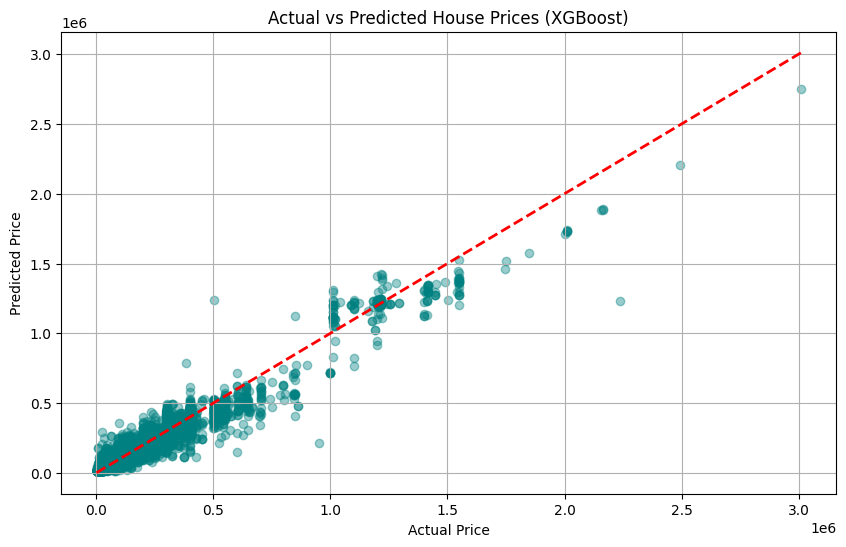

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.4, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (XGBoost)")
plt.grid(True)
plt.show()
